# Visualize circuits

<details>
<summary><b>Package versions</b></summary>

The code on this page was developed using the following requirements.
We recommend using these versions or newer.

```
qiskit[all]~=1.3.1
qiskit-ibm-runtime~=0.34.0
qiskit-aer~=0.15.1
qiskit-serverless~=0.18.1
qiskit-ibm-catalog~=0.2
qiskit-addon-sqd~=0.8.1
qiskit-addon-utils~=0.1.0
qiskit-addon-mpf~=0.2.0
qiskit-addon-aqc-tensor~=0.1.2
qiskit-addon-obp~=0.1.0
scipy~=1.15.0
pyscf~=2.7.0
```
</details>

It's often useful to see the circuits you're creating. Use the following options to display Qiskit circuits.

In [1]:
from qiskit import QuantumCircuit

## Draw a quantum circuit

The `QuantumCircuit` class supports drawing circuits through the `draw()` method, or by printing the circuit object. By default, both render an ASCII art version of the circuit diagram.

Note that `print` returns `None` but has the side effect of printing the diagram, whereas `QuantumCircuit.draw` returns the diagram with no side effects. Since Jupyter notebooks display the output of the last line of each cell, they appear to have the same effect.

In [2]:
# Build a quantum circuit
circuit = QuantumCircuit(3, 3)
circuit.x(1)
circuit.h(range(3))
circuit.cx(0, 1)
circuit.measure(range(3), range(3));

In [3]:
print(circuit)

     ┌───┐          ┌─┐   
q_0: ┤ H ├───────■──┤M├───
     ├───┤┌───┐┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├┤ H ├┤ X ├─╫─┤M├
     ├───┤└┬─┬┘└───┘ ║ └╥┘
q_2: ┤ H ├─┤M├───────╫──╫─
     └───┘ └╥┘       ║  ║ 
c: 3/═══════╩════════╩══╩═
            2        0  1 


In [4]:
circuit.draw()

┌───┐          ┌─┐   
q_0: ┤ H ├───────■──┤M├───
     ├───┤┌───┐┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├┤ H ├┤ X ├─╫─┤M├
     ├───┤└┬─┬┘└───┘ ║ └╥┘
q_2: ┤ H ├─┤M├───────╫──╫─
     └───┘ └╥┘       ║  ║ 
c: 3/═══════╩════════╩══╩═
            2        0  1

### Alternative renderers

A text output is useful for quickly seeing the output while developing a circuit, but it doesn't provide the most flexibility. There are two alternative output renderers for the quantum circuit. One uses [Matplotlib](https://matplotlib.org/) and the other uses [LaTeX](https://www.latex-project.org/). The LaTeX renderer requires the [qcircuit package](https://github.com/CQuIC/qcircuit). Select these renderers by setting the "output" argument to the strings `mpl` and `latex`.

<Admonition type="tip">
  OSX users can get the required LaTeX packages through the [mactex package](https://www.tug.org/mactex/).
</Admonition>

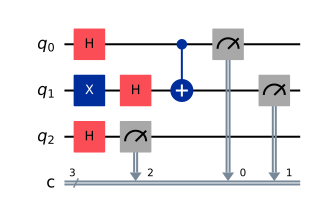

In [5]:
# Matplotlib drawing
circuit.draw(output="mpl")

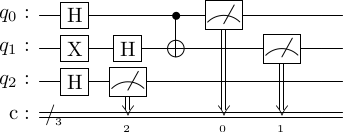

In [6]:
# Latex drawing
circuit.draw(output="latex")

### Control circuit drawings

By default, the `draw()` method returns the rendered image as an object and does not output anything. The exact class returned depends on the output specified: `'text'` (the default) returns a `TextDrawer` object, `'mpl'` returns a `matplotlib.Figure` object, and `latex` returns a `PIL.Image` object. Jupyter notebooks understand these return types and render them properly, but when running outside of Jupyter, images will not display automatically.

The `draw()` method has optional arguments to display or save the output. When specified, the `filename` kwarg takes a path to which it saves the rendered output. Alternatively, if you're using the `mpl` or `latex` outputs, you can use the `interactive` kwarg to open the image in a new window (this will not always work from within a notebook).

### Customize the output

Depending on the output, there are also options to customize the circuit diagram.

#### Disable plot barriers and reverse bit order
The first two options are shared among all three backends. They allow you to configure both the bit orders and whether or not you draw barriers. These can be set by the `reverse_bits` kwarg and `plot_barriers` kwarg, respectively. The following examples work with any output renderer; `mpl` is used here for brevity.

In [7]:
from qiskit import QuantumRegister, ClassicalRegister

# Draw a new circuit with barriers and more registers
q_a = QuantumRegister(3, name="a")
q_b = QuantumRegister(5, name="b")
c_a = ClassicalRegister(3)
c_b = ClassicalRegister(5)

circuit = QuantumCircuit(q_a, q_b, c_a, c_b)
circuit.x(q_a[1])
circuit.x(q_b[1])
circuit.x(q_b[2])
circuit.x(q_b[4])
circuit.barrier()
circuit.h(q_a)
circuit.barrier(q_a)
circuit.h(q_b)
circuit.cswap(q_b[0], q_b[1], q_b[2])
circuit.cswap(q_b[2], q_b[3], q_b[4])
circuit.cswap(q_b[3], q_b[4], q_b[0])
circuit.barrier(q_b)
circuit.measure(q_a, c_a)
circuit.measure(q_b, c_b);

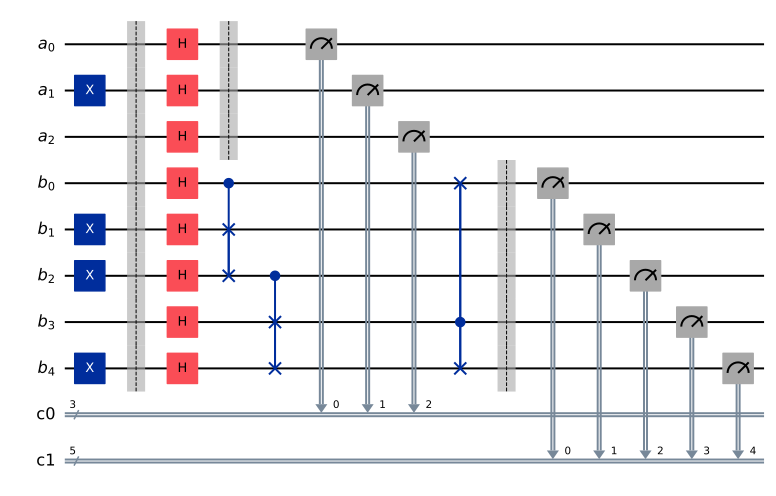

In [8]:
# Draw the circuit
circuit.draw(output="mpl")

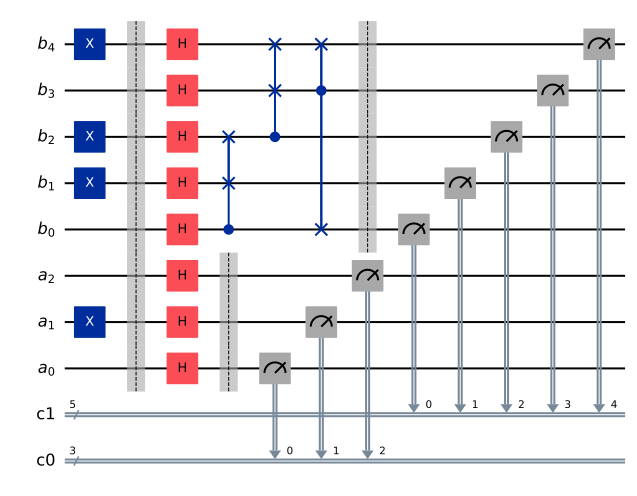

In [9]:
# Draw the circuit with reversed bit order
circuit.draw(output="mpl", reverse_bits=True)

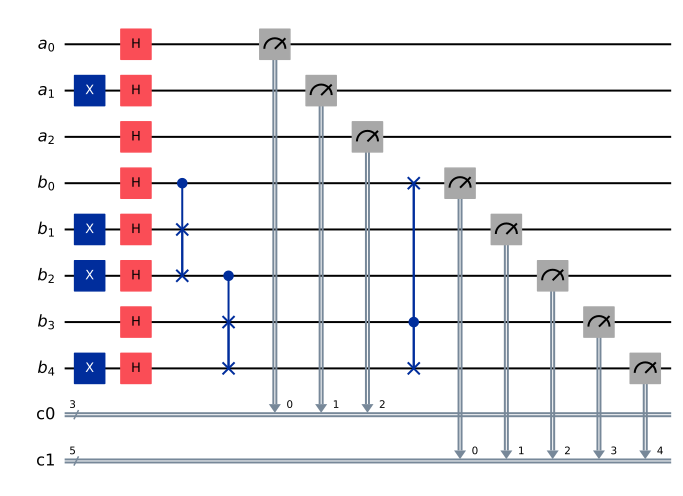

In [10]:
# Draw the circuit without barriers
circuit.draw(output="mpl", plot_barriers=False)

### Renderer-specific customizations

Some available customizing options are specific to a renderer.

The `fold` argument sets a maximum width for the output. In the `text` renderer, this sets the length of the lines of the diagram before it is wrapped to the next line.  When using the 'mpl' renderer, this is the number of (visual) layers before folding to the next line.

The `mpl` renderer has the `style` kwarg, which changes the colors and outlines. See the [API documentation](/api/qiskit/qiskit.circuit.QuantumCircuit#draw) for more details.

The `scale` option scales the output of the `mpl` and `latex` renderers.

In [11]:
circuit = QuantumCircuit(1)
for _ in range(10):
    circuit.h(0)
# limit line length to 40 characters
circuit.draw(output="text", fold=40)

┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐»
q: ┤ H ├┤ H ├┤ H ├┤ H ├┤ H ├┤ H ├┤ H ├»
   └───┘└───┘└───┘└───┘└───┘└───┘└───┘»
«   ┌───┐┌───┐┌───┐
«q: ┤ H ├┤ H ├┤ H ├
«   └───┘└───┘└───┘

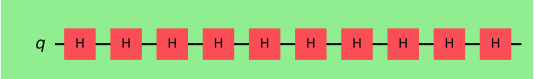

In [12]:
# Change the background color in mpl

style = {"backgroundcolor": "lightgreen"}
circuit.draw(output="mpl", style=style)

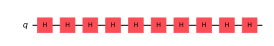

In [13]:
# Scale the mpl output to 1/2 the normal size
circuit.draw(output="mpl", scale=0.5)

### Standalone circuit-drawing function

If you have an application where you prefer to draw a circuit with a self-contained function instead of as a method of a circuit object, you can directly use the `circuit_drawer()` function, which is part of the public stable interface from `qiskit.visualization`. The function behaves identically to the `circuit.draw()` method, except that it takes in a circuit object as a required argument.

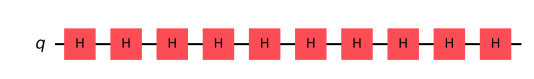

In [14]:
from qiskit.visualization import circuit_drawer

circuit_drawer(circuit, output="mpl", plot_barriers=False)

## Next steps

<Admonition type="tip" title="Recommendations">
  -  See an example of circuit visualization in the [Grover's Algorithm](https://learning.quantum.ibm.com/tutorial/grovers-algorithm) tutorial.
  -  Visualize simple circuits in the [Explore gates and circuits with the Quantum Composer](https://learning.quantum.ibm.com/tutorial/explore-gates-and-circuits-with-the-quantum-composer) tutorial.
  -  Review the [Qiskit visualizations API documentation](/api/qiskit/visualization).
</Admonition>